In [3]:
# -*- coding:utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import cross_validation
from sklearn import metrics
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.metrics import explained_variance_score

% matplotlib inline

In [3]:
path = '/home/liu/mysoft/pycharm/project/quantist/quantist/kaggle/TalkingData/'

In [5]:

# train = pd.read_csv(path + "train.csv", nrows=10000)
test = pd.read_csv(path + "test.csv")
train_sample = pd.read_csv(path + "train_sample.csv")
# sample_submission = pd.read_csv(path + "sample_submission.csv")

# train_sample = train_sample[:1000]
# test = test[:1000]

In [6]:
print(train_sample.shape)
print(train_sample.info())

(100000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB
None


In [7]:
print(test.shape)
print(test.info())

(18790469, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      int64
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    object
dtypes: int64(6), object(1)
memory usage: 1003.5+ MB
None


In [8]:

train_sample['year'] = pd.DatetimeIndex(train_sample.click_time).year
train_sample['month'] = pd.DatetimeIndex(train_sample.click_time).month
train_sample['day'] = pd.DatetimeIndex(train_sample.click_time).day
train_sample['hour'] = pd.DatetimeIndex(train_sample.click_time).hour
train_sample['minute'] = pd.DatetimeIndex(train_sample.click_time).minute
# train_sample['second'] = pd.DatetimeIndex(train_sample.click_time).second

In [9]:

#train_sample                 ip  app  device  os  channel click_time  attributed_time  is_attributed  
# test          click_id      ip  app  device  os  channel click_time
# year, month, day ...
train_sample = train_sample.drop(['click_time', 'attributed_time'], axis=1)
print(train_sample[:3])

       ip  app  device  os  channel  is_attributed  year  month  day  hour  \
0   87540   12       1  13      497              0  2017     11    7     9   
1  105560   25       1  17      259              0  2017     11    7    13   
2  101424   12       1  19      212              0  2017     11    7    18   

   minute  
0      30  
1      40  
2       5  


In [11]:

train_sample_data = train_sample.drop(['is_attributed'], axis=1).values
train_sample_target = train_sample['is_attributed'].values
print('train_sample_data shape is {0}'.format(train_sample_data.shape))
print('train_sample_data target is {0}'.format(train_sample_target.shape))



train_sample_data shape is (100000, 10)
train_sample_data target is (100000,)


In [11]:
cv = cross_validation.ShuffleSplit(len(train_sample), n_iter=3, test_size=0.2, random_state=0)

In [14]:
def print_metric():
     print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(train_sample_data[train], train_sample_target[train]),
        svc.score(train_sample_data[test], train_sample_target[test])
    ))

In [16]:
# Ride

for train, test in cv:
    svc = linear_model.Ridge().fit(train_sample_data[train], train_sample_target[train])
    print_metric()

train score:0.007, test score:0.012



train score:0.009, test score:0.005



train score:0.008, test score:0.008



In [18]:
# # SVM
# 
# for train, test in cv:
#     svc = svm.SVR(kernel='rbf', C=10, gamma=.001).fit(train_sample_data[train], train_sample_target[train])
#     print_metric()

In [20]:
# RandomForestRegressor
for train, test in cv:
    rfr = RandomForestRegressor(n_estimators=100).fit(train_sample_data[train], train_sample_target[train])
    print_metric()

train score:0.007, test score:0.013



train score:0.009, test score:0.006



train score:0.008, test score:0.008



In [21]:
X = train_sample_data
y = train_sample_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

n_estimators = [{'n_estimators':[10, 100, 500]}]
scores = ['r2']
for score in scores:
    print(score)
    
    clf = GridSearchCV(RandomForestRegressor(), n_estimators, cv=5, scoring=score)
    clf.fit(X_train, y_train)
    
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    

r2


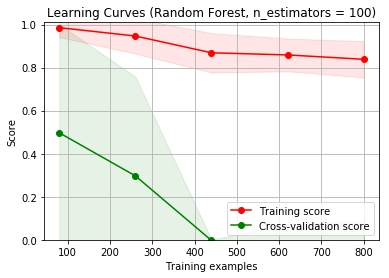

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = cross_validation.ShuffleSplit(train_sample_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
# If overfitting

for train, test in cv: 
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(train_sample_data[train], train_sample_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(train_sample_data[train], train_sample_target[train]), svc.score(train_sample_data[test], train_sample_target[test])))

train score: 0.838, test score: -0.120



train score: 0.881, test score: 0.000



train score: 1.000, test score: -0.010



train score: 1.000, test score: -0.010



train score: 0.835, test score: 0.000



train score: 0.850, test score: 0.000



train score: 0.839, test score: 0.000



train score: 0.855, test score: 0.000



train score: 0.860, test score: 0.000



train score: 0.840, test score: -0.005



In [ ]:
# Haddle test data

test['year'] = pd.DatetimeIndex(test.click_time).year
test['month'] = pd.DatetimeIndex(test.click_time).month
test['day'] = pd.DatetimeIndex(test.click_time).day
test['hour'] = pd.DatetimeIndex(test.click_time).hour
test['minute'] = pd.DatetimeIndex(test.click_time).minute

AttributeError: 'numpy.ndarray' object has no attribute 'click_time'

In [ ]:
#train_sample                 ip  app  device  os  channel click_time  attributed_time  is_attributed  
# test          click_id      ip  app  device  os  channel click_time
# year, month, day ...
test = test.drop(['click_id', 'click_time'], axis=1).values
print(test.shape)
print(test[:3])

In [ ]:
# If overfitting

for train, test in cv: 
    rfr = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(X, y)
    result = rfr.predict(test)
    print(result[:5])
    # print("train score: {0:.3f}, test score: {1:.3f}\n".format(
    #     svc.score(train_sample_data[train], train_sample_target[train]), svc.score(train_sample_data[test], train_sample_target[test])))

ValueError: Expected 2D array, got 1D array instead:
array=[ 993.  859.  298.  553.  672.  971.   27.  231.  306.  706.  496.  558.
  784.  239.  578.   55.  906.  175.   14.   77.   31.  481.  310.  311.
  883.  788.   45.  103.  760.    1.  823.  710.  614.  790.  408.  736.
  957.  366.  918.  267.  230.  996.  635.  698.  251.  783.  819.  141.
  316.  587.  331.  295.  262.  432.  862.  582.  272.  270.  987.  319.
  569.  643.  142.  202.  413.  196.  264.  531.  252.  576.  738.  299.
  740.  247.  926.  412.  389.  796.  601.  654.  261.  456.  386.  982.
  909.  693.  236.  501.  497.  874.  452.  494.  923.  279.  638.  485.
  568.  108.  367.  644.  785.  873.   65.  902.  317.  636.  666.  789.
  958.  214.   97.  583.  466.  523.  255.  385.  545.  382.  489.  513.
  780.  904.  122.  946.   60.  844.  372.  283.  939.  608.  495.  630.
  596.  713.  753.  624.  312.    8.  529.  876.  101.  615.  520.  249.
  278.  424.  384.  395.   54.   34.  271.   30.  403.  757.  975.  990.
  457.  362.  860.  483.  580.  986.  688.  864.  927.  378.  320.  942.
  351.  418.  945.  795.  145.  826.  492.  751.  240.  648.  886.  144.
  767.  999.  467.  315.  989.  922.  717.  458.  773.  204.  834.  832.
  435.    5.  769.  679.  722.  215.  653.  150.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


关于现在这个模型
准确率 : 0.9985


AUC 得分 (训练集): 0.993478


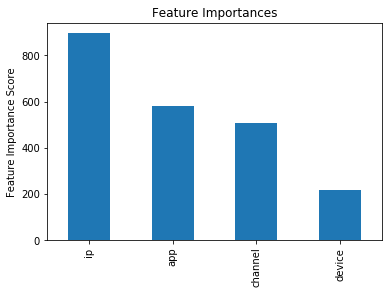